#**Importing the Required Libraries**

In [1]:
import os


In [2]:
import glob

In [3]:
from IPython.display import Image, display

In [4]:
from IPython import display

In [5]:
display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [6]:
!nvidia-smi

Wed Oct 11 02:33:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
HOME = os.getcwd()

In [8]:
print(HOME)

/content


#**Installing Ultralytics using Pip Install**

In [9]:
!pip install -qqq ultralytics==8.0.0
!pip install -q torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2+cu118 torchtext==0.15.2 torchdata==0.6.1 --extra-index-url https://download.pytorch.org/whl/cu118 -U

##Checking whether YOLOv8 is Installed and its working Fine

In [10]:
import ultralytics

In [11]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.7/166.8 GB disk)


#**Importing the Potholes Images Dataset from Roboflow**

In [12]:
!mkdir {HOME}/datasets


mkdir: cannot create directory ‘/content/datasets’: File exists


In [13]:
!pwd

/content


In [14]:
%cd {HOME}/datasets


/content/datasets


In [15]:
!pwd

/content/datasets


In [16]:

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QKnIGsOx41j1fVIu70oi")
project = rf.workspace("computervisionproject-eanfc").project("potholedetectionyolov8-vjlif")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PotholeDetectionYOLOv8-1 in yolov5pytorch:: 100%|██████████| 812/812 [00:00<00:00, 5063.49it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [17]:
%cd {HOME}

/content


In [18]:
%cd {dataset.location}

/content/datasets/PotholeDetectionYOLOv8-1


In [19]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/PotholeDetectionYOLOv8-1/data.yaml epochs=70 imgsz=640

/content
100% 49.7M/49.7M [00:00<00:00, 233MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/PotholeDetectionYOLOv8-1/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, 

In [20]:
!ls {HOME}//runs/detect/train

args.yaml					    train_batch1320.jpg
confusion_matrix.png				    train_batch1321.jpg
events.out.tfevents.1696991710.e30e6891089a.2631.0  train_batch1322.jpg
F1_curve.png					    train_batch1.jpg
P_curve.png					    train_batch2.jpg
PR_curve.png					    val_batch0_labels.jpg
predictions.json				    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    weights
train_batch0.jpg


#**Displaying the Confusion Matrix**

/content


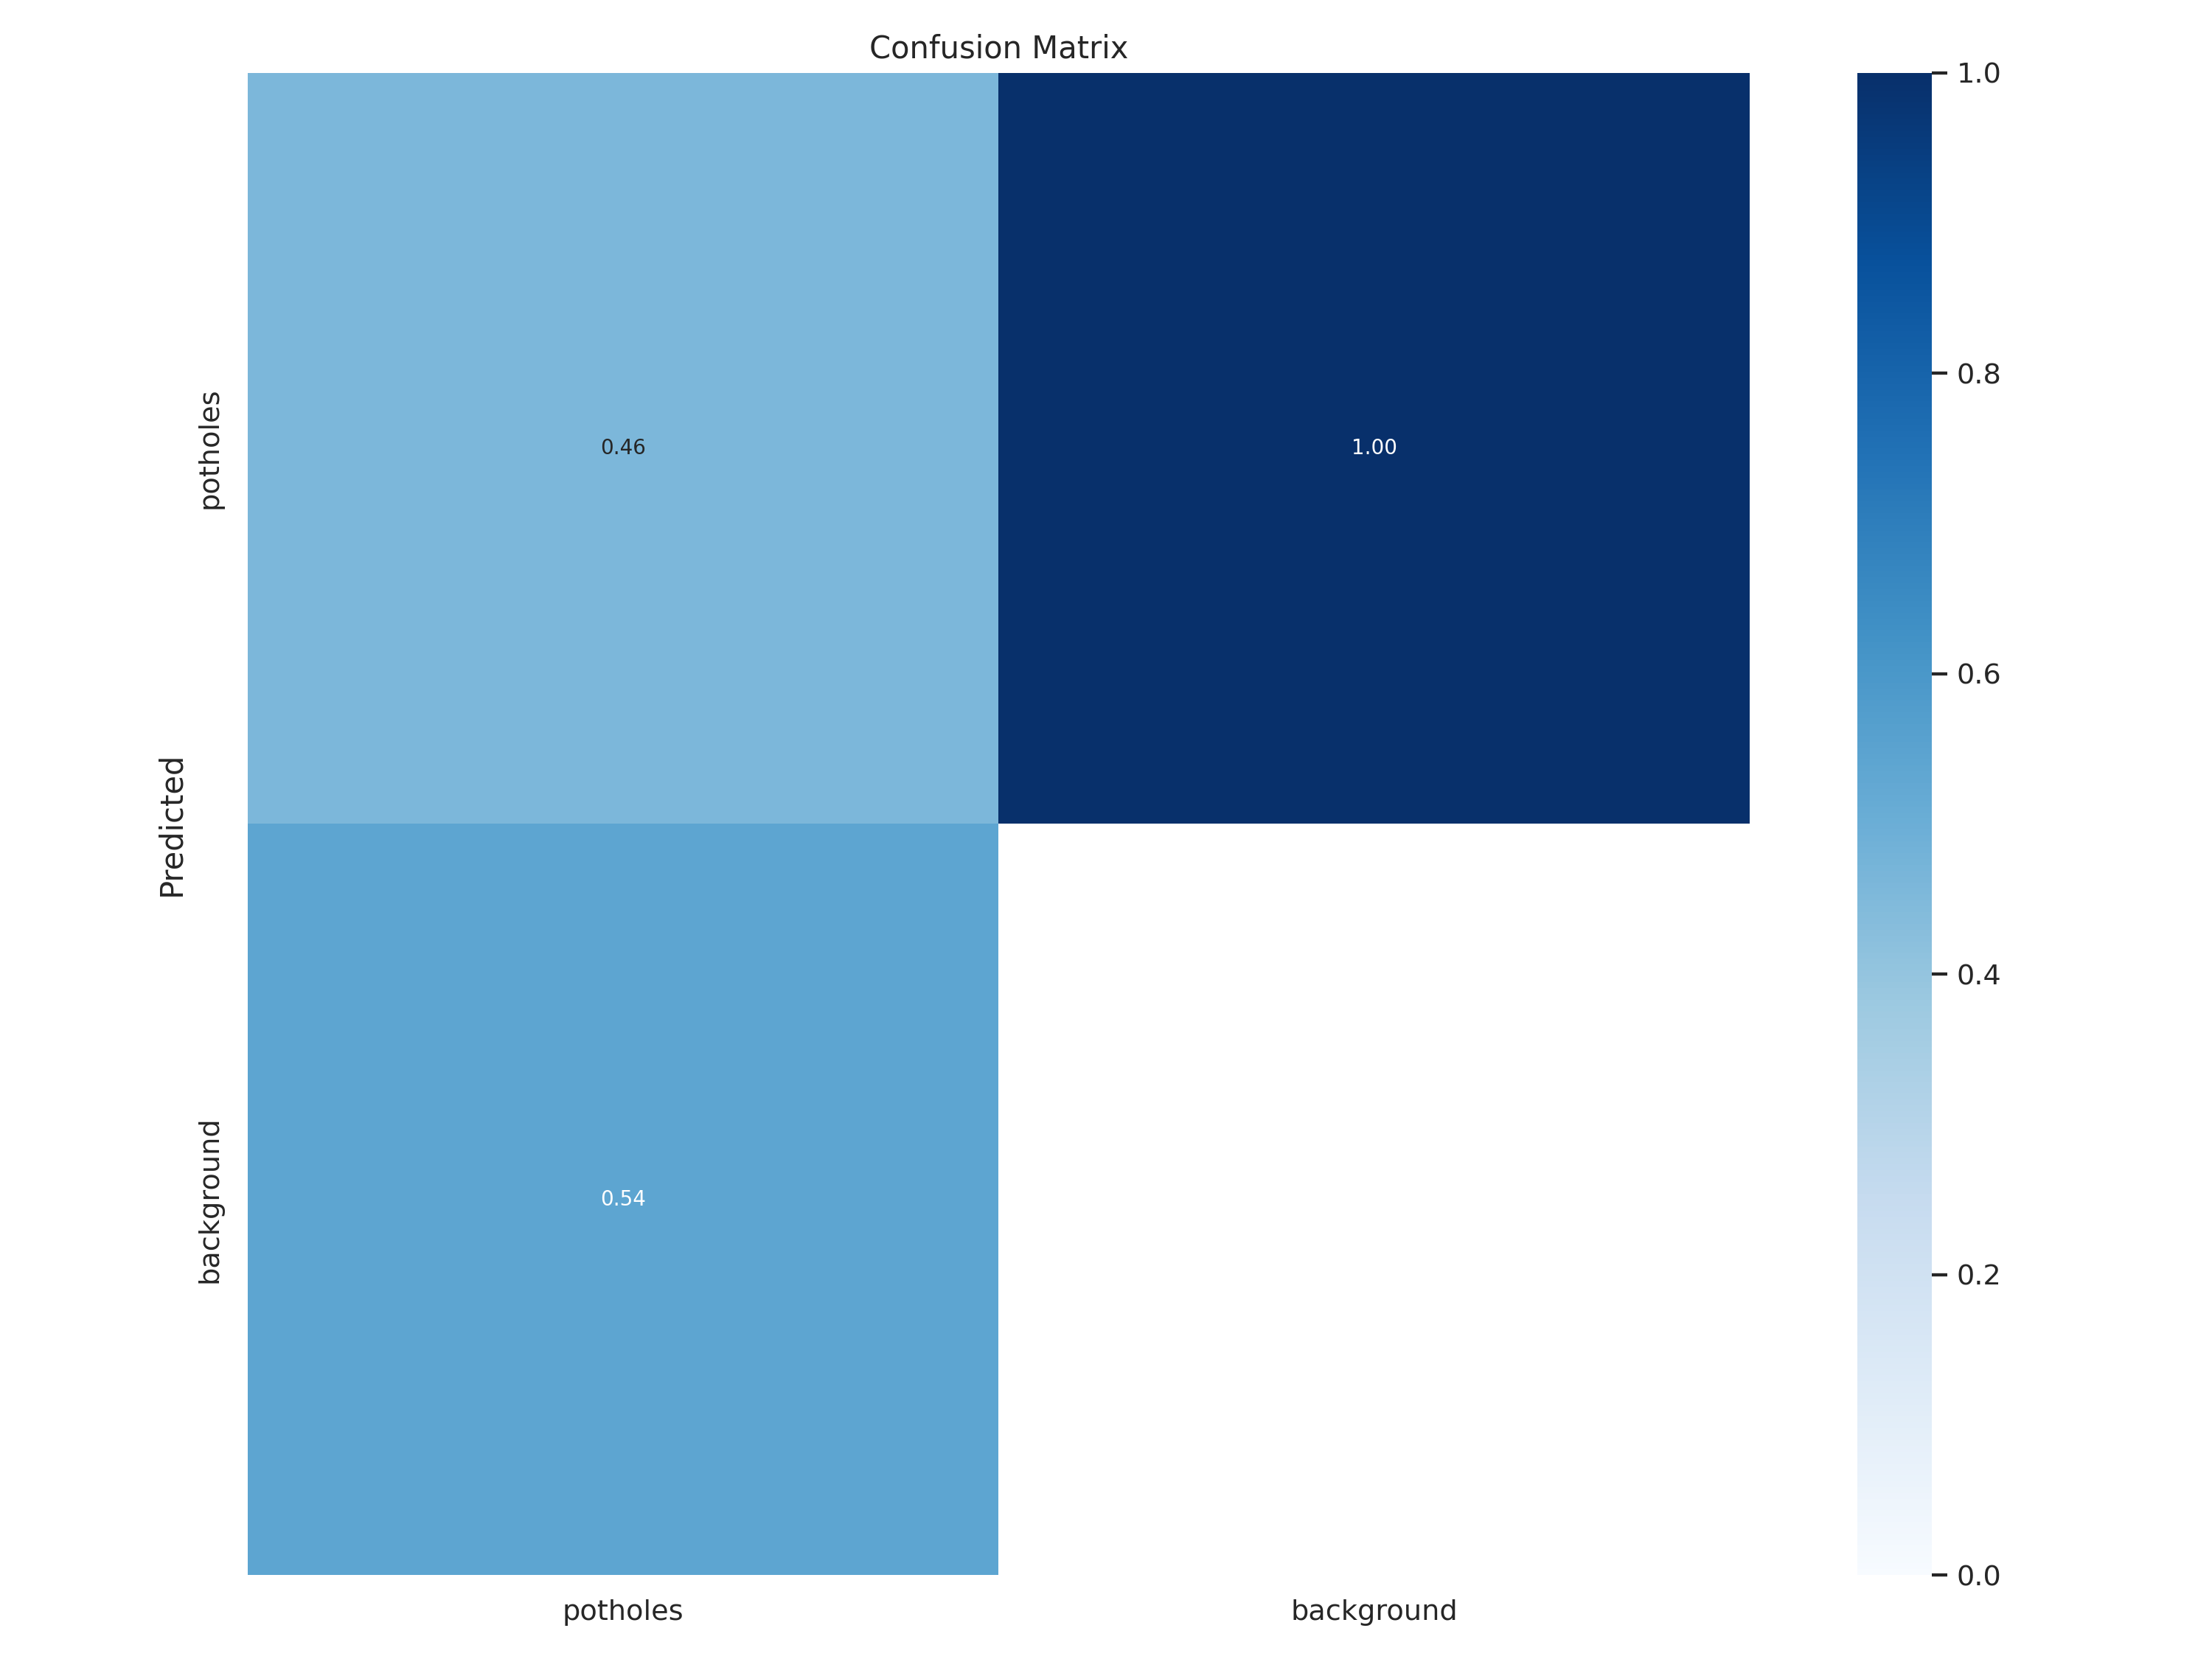

In [21]:
#Confusion matrix is the chart that shows how our model handles different classes
#68% of the time the model detected correctly that there is a pothole, while 32% of the time, when the pothole is there but the model is not
#able to detect it
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

#**Training and Validation Loss**

/content


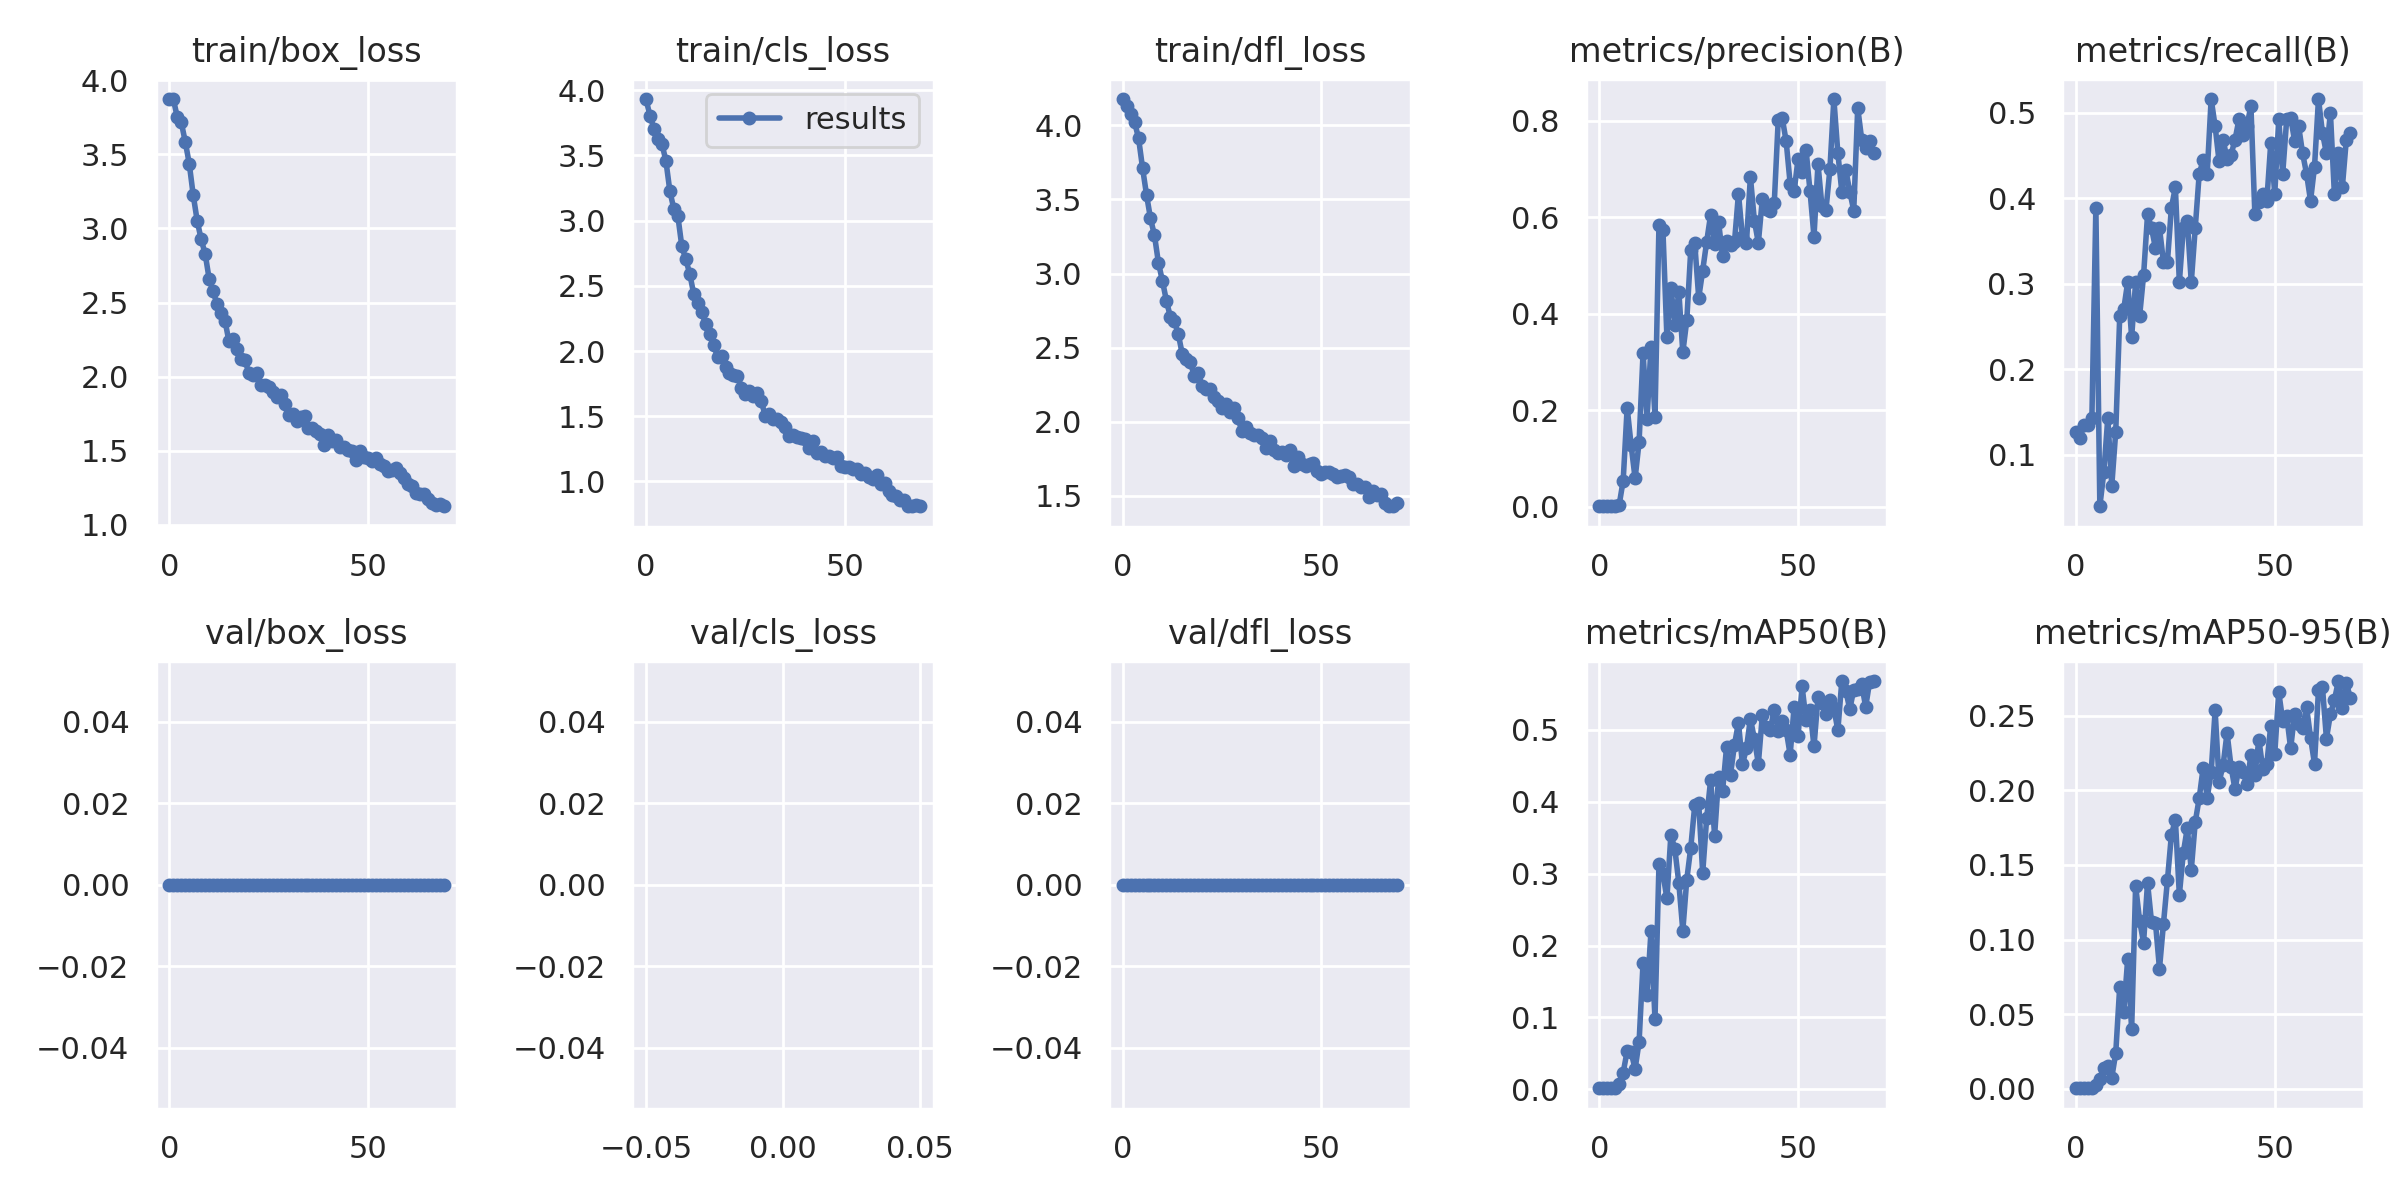

In [22]:
# Here is the graph of the training and validation loss
#box loss and class loss is important
# The behavior of the model is convincing the model is coverging, Training more will give better results
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


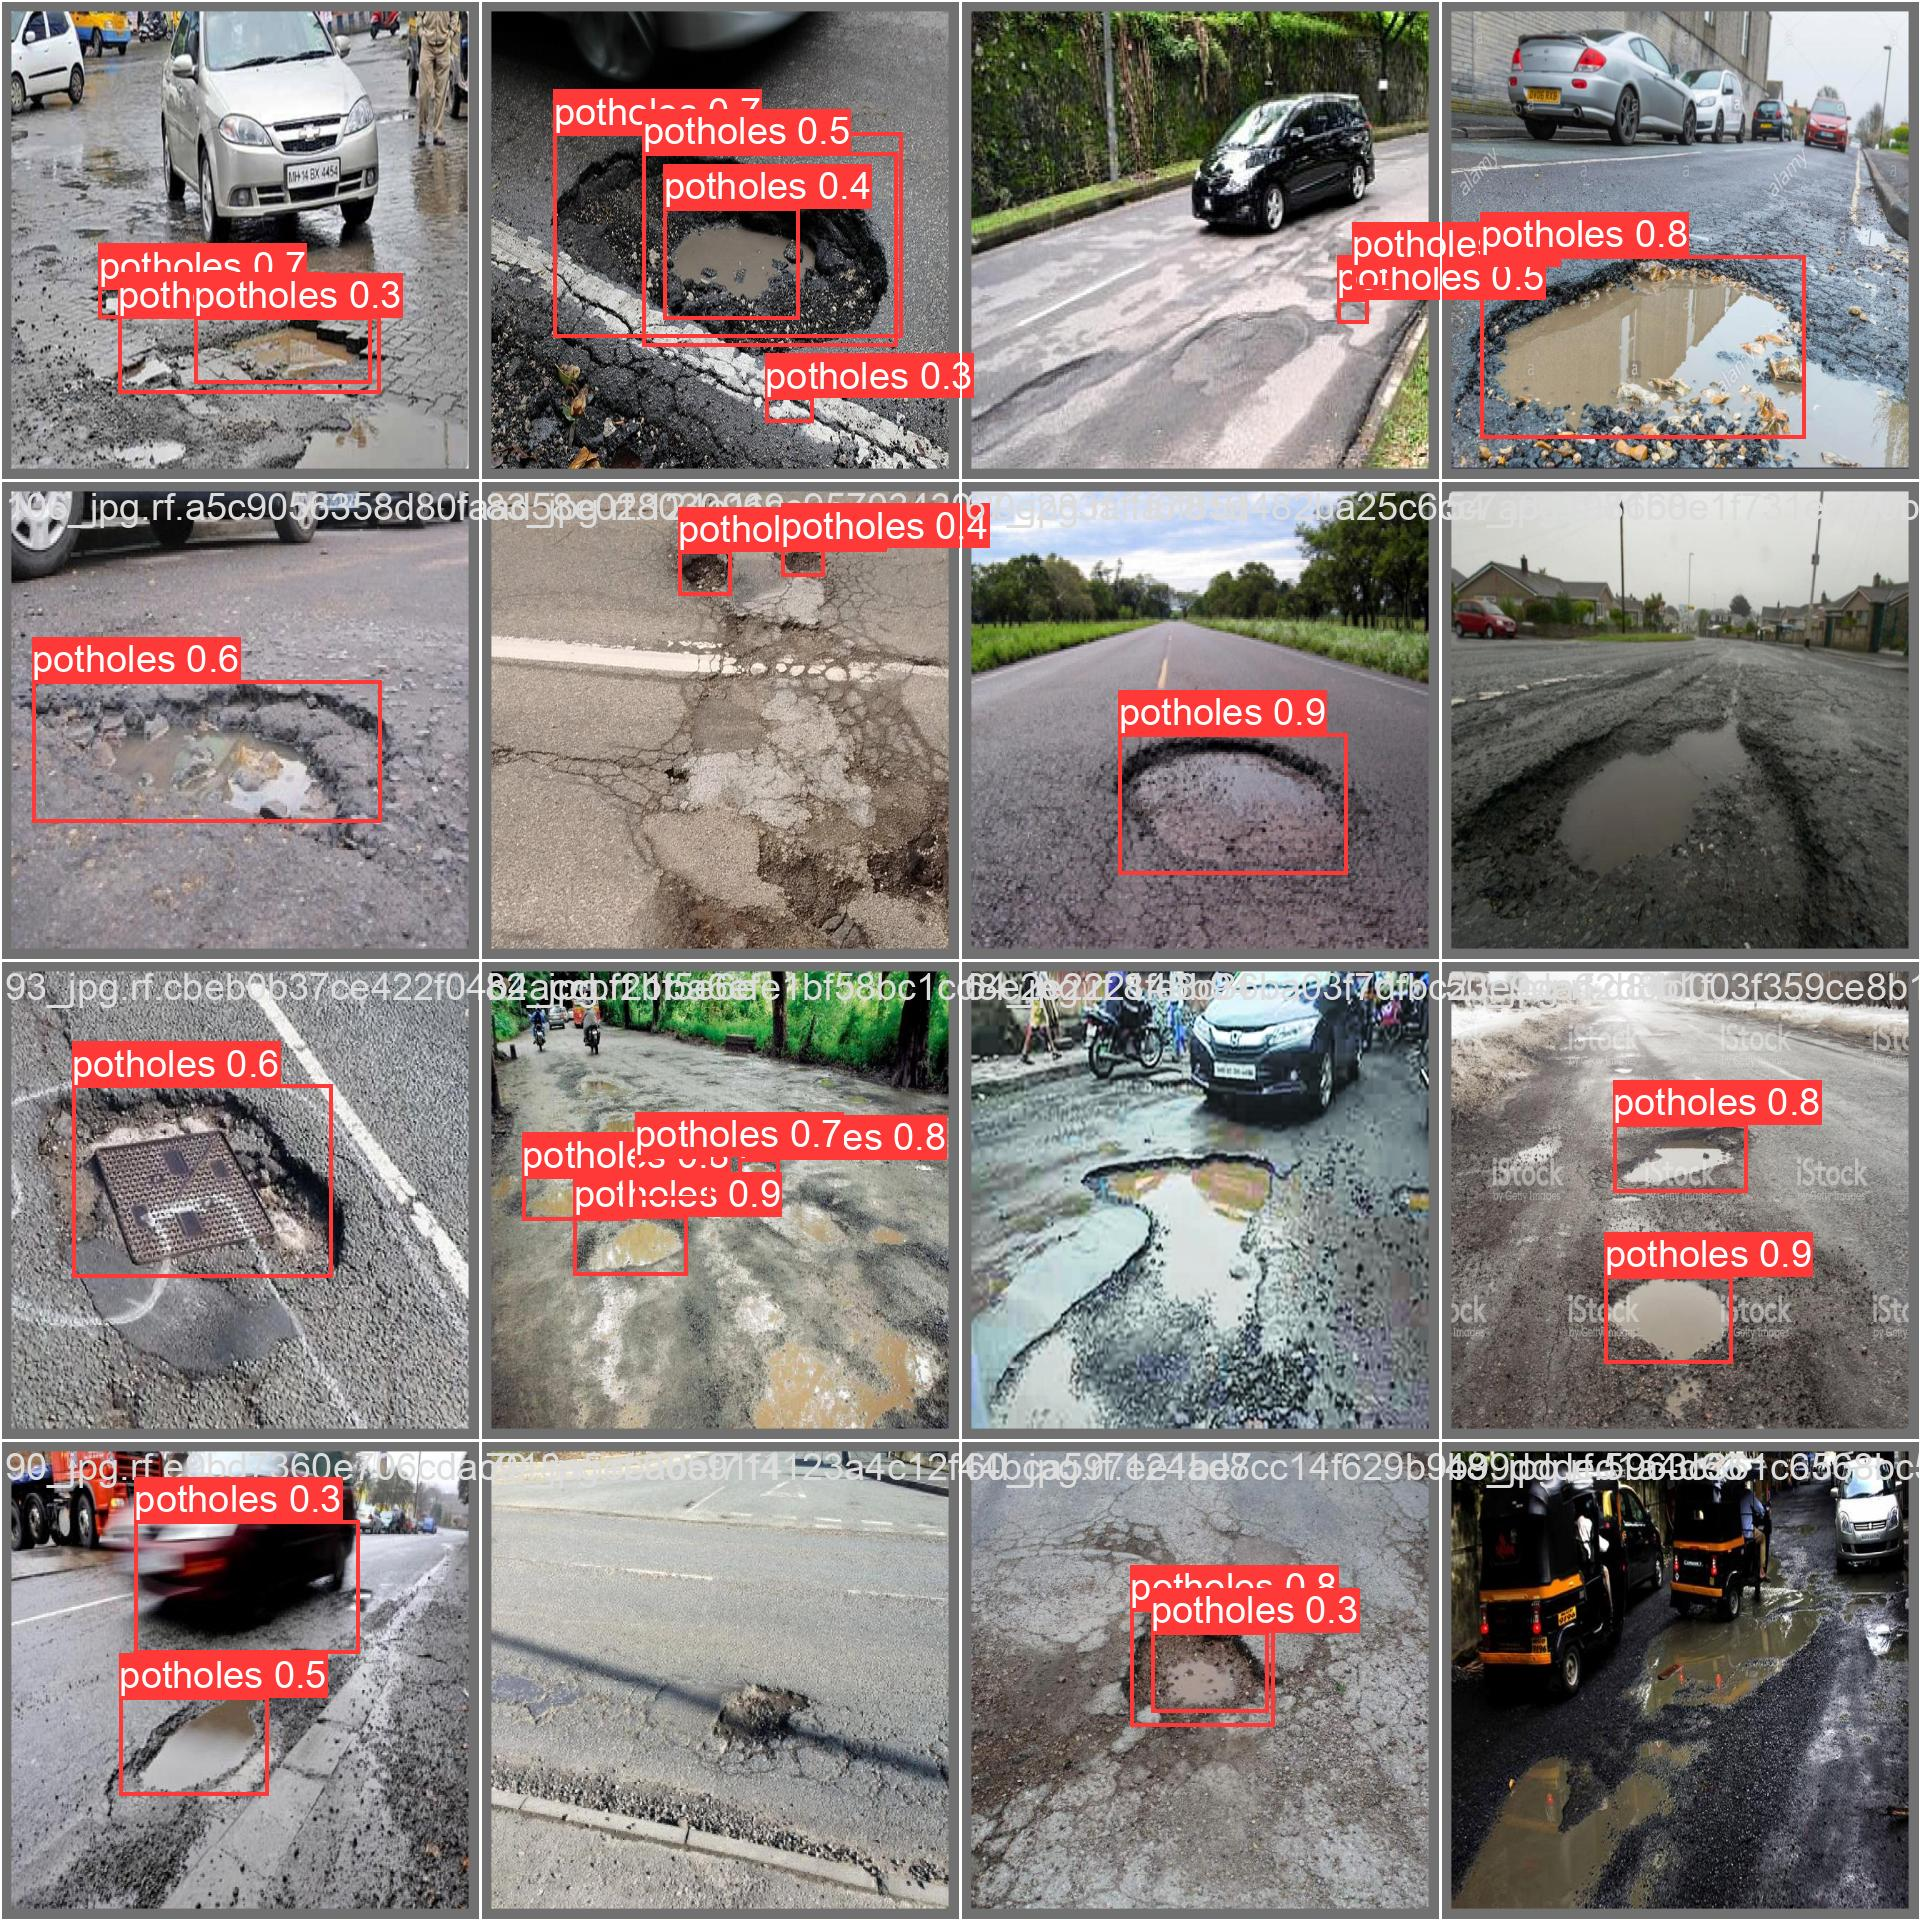

In [23]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a
#look and see how model is behaving
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

#**Validate Custom Model**

In [27]:
#Here, we are taking the model best weights and using them to validate the model. Similarly as before we are using
#CLI to do that, The only difference is our mode = val instead of train
#Validation Script is using test dataset that was not used beforew

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/PotholeDetectionYOLOv8-1/data.yaml

/content
2023-10-11 02:59:14.163869: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-11 02:59:15.161868: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/PotholeDetectionYOLOv8-1/valid/labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100% 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.08s/it]
                   all         34        126      0.704      0.476      0.565      0.272
Speed: 3.6ms pre-proc

#**Inference with Custom Model**

In [28]:
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/PotholeDetectionYOLOv8-1/test/images

/content
2023-10-11 03:00:07.757299: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-11 03:00:08.766188: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
image 1/16 /content/datasets/PotholeDetectionYOLOv8-1/test/images/107_jpg.rf.b96abac0dc19b85b86e87fc77c109431.jpg: 640x640 37.0ms
image 2/16 /content/datasets/PotholeDetectionYOLOv8-1/test/images/119_jpg.rf.d00246930980ac42ca2e424b001cd662.jpg: 640x640 2 potholess, 37.0ms
image 3/16 /content/datasets/PotholeDetectionYOLOv8-1/test/images/126_jpg.rf.ab1677e140d9bbcab69ec65a1af7

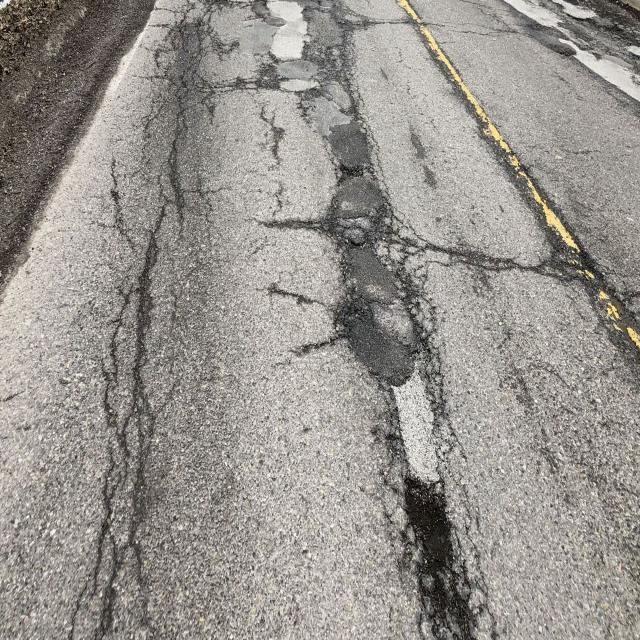

In [30]:
Image("/content/runs/detect/predict/107_jpg.rf.b96abac0dc19b85b86e87fc77c109431.jpg")

#**Testing on a Demo Video**

In [31]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 146MB/s]


In [32]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/demo.mp4'

/content
2023-10-11 03:03:24.169543: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-11 03:03:25.170076: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/324) /content/demo.mp4: 384x640 64.8ms
video 1/1 (2/324) /content/demo.mp4: 384x640 25.9ms
video 1/1 (3/324) /content/demo.mp4: 384x640 1 potholes, 25.8ms
video 1/1 (4/324) /content/demo.mp4: 384x640 25.8ms
video 1/1 (5/324) /content/demo.mp4: 384x640 25.8ms
video 1/1 (6/324) /content/demo.mp4: 384x640 25.8ms
video 1/1 (7/324) /content/demo.mp4: 384x640 25.8ms
vi

#**Display the Demo Video**

In [33]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [34]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict2/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)